# Modulos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import xarray as xr
import scipy.stats as stats
from mpl_toolkits.axes_grid1 import make_axes_locatable

# FUNCIONES

In [2]:
def plot_conditional(data, x_edges, y_edges, title, xlabel, ylabel, cmap='viridis'):
    fig, ax = plt.subplots(figsize=(6, 5))
    im = ax.imshow(data.T, origin='lower', aspect='auto',
                   extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]],
                   vmin=0, vmax=10,
                   cmap=cmap)
    plt.colorbar(im, ax=ax, label='Ratio')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    plt.show()

# Datos

* https://www.science.org/doi/10.1126/science.1123560
* https://www.researchgate.net/publication/7236082_Hoyos_C_D_Agudelo_P_A_Webster_P_J_Curry_J_A_Deconvolution_of_the_factors_contributing_to_the_increase_in_global_hurricane_intensity_Science_312_94-97


In [3]:
n = 500_000
tiempo = np.arange(0, n, 1)
X = np.random.normal(loc=0, scale=1.0, size=n)
Z = np.random.normal(loc=0, scale=1.0, size=n)
B = .7
C = .3
K = (B**2 + C**2)**(1/2)
Y = (B * X + C * Z )/ K

# Figuras

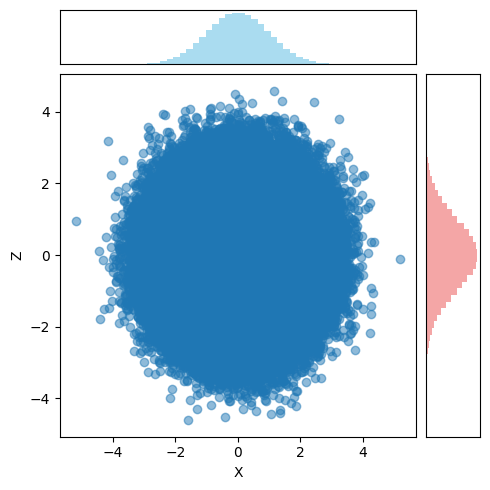

In [4]:
# Create a figure and a main axes for the scatter plot
fig = plt.figure(figsize=(5, 5))
ax_scatter = fig.add_subplot(111)

# Create the scatter plot
ax_scatter.scatter(X, Z, alpha=.5)
ax_scatter.set_ylabel('Z')
ax_scatter.set_xlabel('X')

# Create a divider for the main axes
divider = make_axes_locatable(ax_scatter)

# Add axes for the histograms on the sides of the scatter plot
ax_hist_x = divider.append_axes("top", size="15%", pad=0.1, sharex=ax_scatter)
ax_hist_z = divider.append_axes("right", size="15%", pad=0.1, sharey=ax_scatter)

# Remove axis labels and tick marks for the histograms
ax_hist_x.xaxis.set_visible(False)
ax_hist_x.yaxis.set_visible(False)
ax_hist_z.xaxis.set_visible(False)
ax_hist_z.yaxis.set_visible(False)

# Plot histograms of X and Z
ax_hist_x.hist(X, bins=50, density=True, alpha=0.7, color='skyblue')
ax_hist_z.hist(Z, bins=50, density=True, alpha=0.7, color='lightcoral', orientation='horizontal')

# Adjust layout
plt.tight_layout()
plt.show()

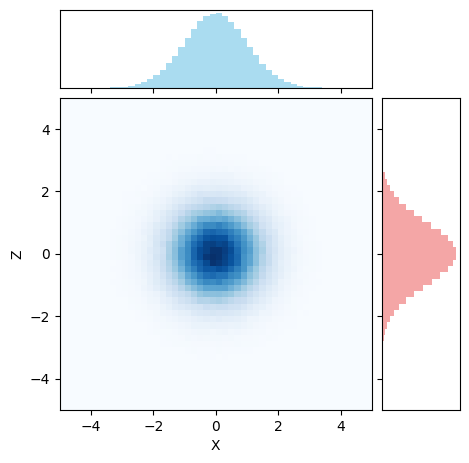

In [5]:
fig = plt.figure(figsize=(5, 5))
gs = fig.add_gridspec(2, 2, width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax_bivar = fig.add_subplot(gs[1, 0])
ax_hist_x = fig.add_subplot(gs[0, 0], sharex=ax_bivar)
ax_hist_z = fig.add_subplot(gs[1, 1], sharey=ax_bivar)
bins = np.linspace(-5, 5, 51) # Define bins from -5 to 5
# Bivariate histogram
hist_bivar, xedges, yedges, img = ax_bivar.hist2d(X, Z, bins=bins, cmap='Blues')
ax_bivar.set_xlabel('X')
ax_bivar.set_ylabel('Z')

# Marginal histogram for X
hist_x, bins_x, _ = ax_hist_x.hist(X, bins=bins, density=True, alpha=0.7, color='skyblue')
ax_hist_x.tick_params(axis='x', labelbottom=False)
ax_hist_x.set_yticks([])

# Marginal histogram for Z
hist_z, bins_z, _ = ax_hist_z.hist(Z, bins=bins, density=True, alpha=0.7, color='lightcoral', orientation='horizontal')
ax_hist_z.tick_params(axis='y', labelleft=False)
ax_hist_z.set_xticks([])

plt.show()

# Store the histogram values and bins
bivar_hist_XZ = hist_bivar
bivar_x_edges = xedges
bivar_z_edges = yedges
marginal_hist_X = hist_x
marginal_bins_X = bins_x
marginal_hist_Z = hist_z
marginal_bins_Z = bins_z

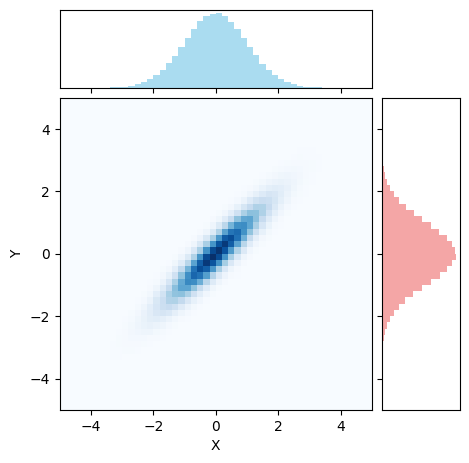

In [6]:
# Create a figure and main axes for the bivariate histogram
fig = plt.figure(figsize=(5, 5))
gs = fig.add_gridspec(2, 2, width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax_bivar = fig.add_subplot(gs[1, 0])
ax_hist_x = fig.add_subplot(gs[0, 0], sharex=ax_bivar)
ax_hist_y = fig.add_subplot(gs[1, 1], sharey=ax_bivar)
bins = np.linspace(-5, 5, 51)  # Define bins from -5 to 5

# Bivariate histogram
hist_bivar, xedges, yedges, img = ax_bivar.hist2d(X, Y, bins=bins, cmap='Blues')
ax_bivar.set_xlabel('X')
ax_bivar.set_ylabel('Y')

# Marginal histogram for X
hist_x, bins_x, _ = ax_hist_x.hist(X, bins=bins, density=True, alpha=0.7, color='skyblue')
ax_hist_x.tick_params(axis='x', labelbottom=False)
ax_hist_x.set_yticks([])

# Marginal histogram for Y
hist_y, bins_y, _ = ax_hist_y.hist(Y, bins=bins, density=True, alpha=0.7, color='lightcoral', orientation='horizontal')
ax_hist_y.tick_params(axis='y', labelleft=False)
ax_hist_y.set_xticks([])

plt.show()

# Store the histogram values and bins
bivar_hist_XY = hist_bivar
bivar_x_edges = xedges
bivar_y_edges = yedges
marginal_hist_X = hist_x
marginal_bins_X = bins_x
marginal_hist_Y = hist_y
marginal_bins_Y = bins_y

In [8]:
marginal_product_XZ = marginal_hist_X[:, np.newaxis] * marginal_hist_Z[np.newaxis, :]
marginal_product_XY = marginal_hist_X[:, np.newaxis] * marginal_hist_Y[np.newaxis, :]

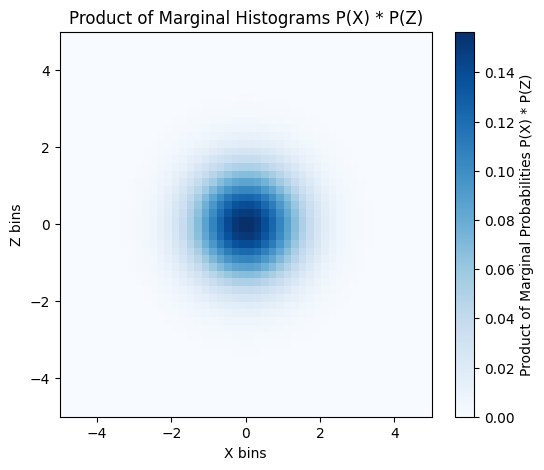

In [9]:
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(marginal_product_XZ.T, origin='lower', aspect='auto',
               extent=[bivar_x_edges[0], bivar_x_edges[-1], bivar_z_edges[0], bivar_z_edges[-1]],
               cmap='Blues')
plt.colorbar(im, ax=ax, label='Product of Marginal Probabilities P(X) * P(Z)')
ax.set_xlabel('X bins')
ax.set_ylabel('Z bins')
ax.set_title('Product of Marginal Histograms P(X) * P(Z)')
plt.show()

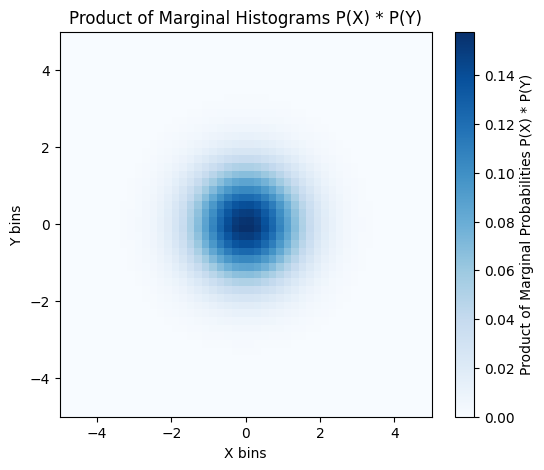

In [10]:
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(marginal_product_XY.T, origin='lower', aspect='auto',
               extent=[bivar_x_edges[0], bivar_x_edges[-1], bivar_y_edges[0], bivar_y_edges[-1]],
               cmap='Blues')
plt.colorbar(im, ax=ax, label='Product of Marginal Probabilities P(X) * P(Y)')
ax.set_xlabel('X bins')
ax.set_ylabel('Y bins')
ax.set_title('Product of Marginal Histograms P(X) * P(Y)')
plt.show()

In [11]:
epsilon = 1e-10
condicional_XZ = (bivar_hist_XZ/bivar_hist_XZ.sum()) / ((marginal_product_XZ/marginal_product_XZ.sum()) + epsilon)
condicional_XY = (bivar_hist_XY/bivar_hist_XY.sum()) / ((marginal_product_XY/marginal_product_XY.sum()) + epsilon)

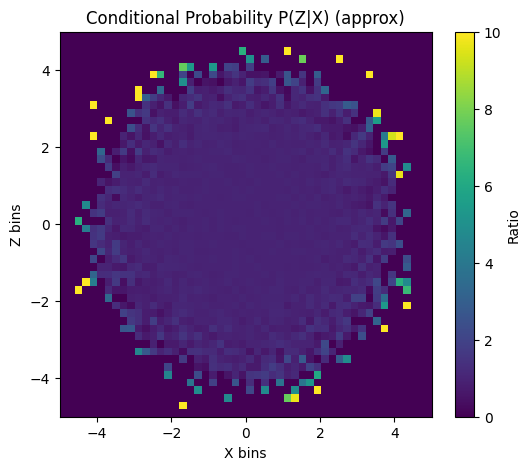

In [12]:
plot_conditional(condicional_XZ, bivar_x_edges, bivar_z_edges,
                 'Conditional Probability P(Z|X) (approx)', 'X bins', 'Z bins', cmap='viridis')

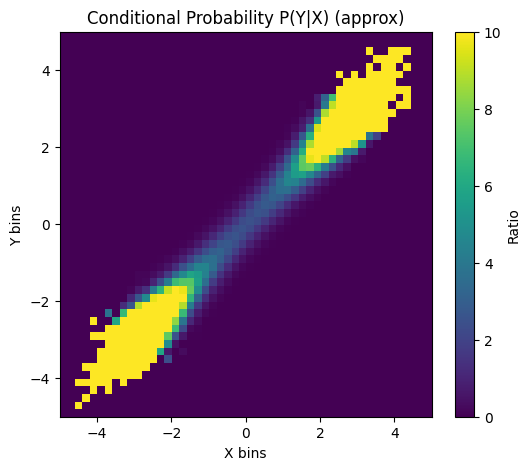

In [13]:
plot_conditional(condicional_XY, bivar_x_edges, bivar_y_edges,
                 'Conditional Probability P(Y|X) (approx)', 'X bins', 'Y bins', cmap='viridis')

In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Crear subplots con 1 fila y 2 columnas
fig_combined = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Conditional Probability P(Z|X) (approx)',
                   'Conditional Probability P(Y|X) (approx)'),
    horizontal_spacing=0.1,  # Espacio entre gráficos
    specs=[[{"secondary_y": False}, {"secondary_y": False}]]
)

# Agregar primer heatmap (P(Z|X))
fig_combined.add_trace(
    go.Heatmap(
        z=condicional_XZ.T,
        colorscale='viridis',
        zmin=0,
        zmax=10,
        showscale=False,
        colorbar=dict(x=0.45, len=0.8, title="Ratio")  # Posición del colorbar
    ),
    row=1, col=1
)

# Agregar segundo heatmap (P(Y|X))
fig_combined.add_trace(
    go.Heatmap(
        z=condicional_XY.T,
        colorscale='viridis',
        zmin=0,
        zmax=10,
        showscale=True,
        colorbar=dict(x=1.02, len=0.8, title="Ratio")  # Posición del colorbar
    ),
    row=1, col=2
)

# Actualizar layout
fig_combined.update_layout(
    title_text="Conditional Probabilities Comparison",
    height=500,
    width=1000,
    showlegend=False
)

# Actualizar ejes individuales
fig_combined.update_xaxes(title_text="X bins", showgrid=False, row=1, col=1)
fig_combined.update_yaxes(title_text="Z bins", showgrid=False, row=1, col=1)
fig_combined.update_xaxes(title_text="X bins", showgrid=False, row=1, col=2)
fig_combined.update_yaxes(title_text="Y bins", showgrid=False, row=1, col=2)

fig_combined.show()